# Oblig 1 STK4900
I chose to solve the mandatory assignment in a Jupyter Notebook. Using the tool "rpy2" I can use Python and R in the same code. This enables me to solve most tasks in Python as I am more familiar with Python than R while still being able to resort to R when needed.

In [2]:
# Loading in R:
%load_ext rpy2.ipython

/Users/bernhard/.local/share/virtualenvs/STK4900-oblig1-uunOJvex/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [44]:
# Automatically making my code look nice
%load_ext nb_black

<IPython.core.display.Javascript object>

In [111]:
# Importing common Python packages
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn import linear_model as skllm
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

## Task 1 a)

In [45]:
# Loading in dataframe.
df = pd.read_csv("no2.txt", delimiter="\s+")
df

,log.no2,log.cars,temp,wind.speed,hour.of.day
0,3.71844,7.69120,9.2,4.8,20
1,3.10009,7.69894,6.4,3.5,14
2,3.31419,4.81218,-3.7,0.9,4
3,4.38826,6.95177,-7.2,1.7,23
4,4.34640,7.51806,-1.3,2.6,11
...,...,...,...,...,...
495,4.30946,7.68202,3.5,5.0,11
496,2.94444,6.52942,9.5,6.5,10
497,4.17439,7.75791,5.2,4.6,14
498,2.95491,5.78996,8.4,0.5,7


<IPython.core.display.Javascript object>

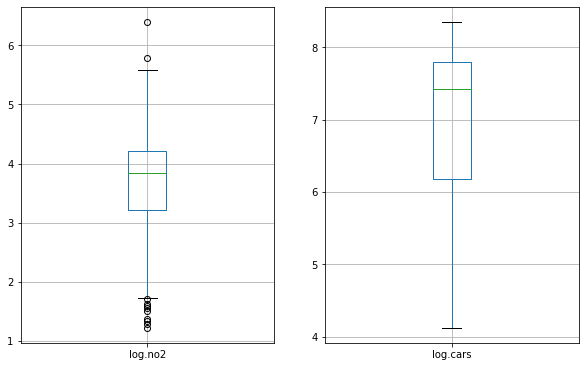

Cars: 7.0+-1.1
NO2: 3.7+-0.7


<IPython.core.display.Javascript object>

In [46]:
mean_cars = np.mean(df["log.cars"])
stddev_cars = np.std(df["log.cars"])
mean_no2 = np.mean(df["log.no2"])
stddev_no2 = np.std(df["log.no2"])
fig, ax = plt.subplots(1, 2, figsize=[10, 10 / 1.618])
df.boxplot("log.no2", ax=ax[0])
df.boxplot("log.cars", ax=ax[1])
plt.show()
print(f"Cars: {mean_cars:.1f}+-{stddev_cars:.1f}")
print(f"NO2: {mean_no2:.1f}+-{stddev_no2:.1f}")

There are more outliers in NO2.

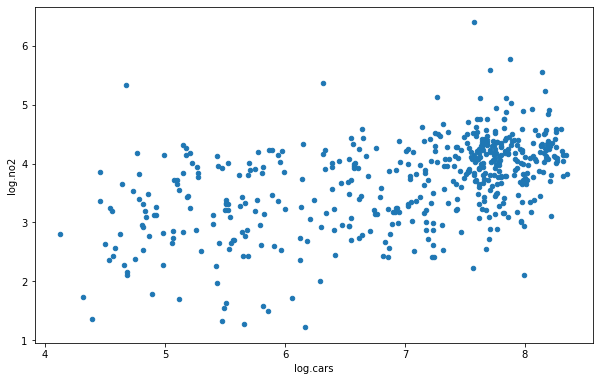

<IPython.core.display.Javascript object>

In [80]:
fig, ax = plt.subplots(1, 1, figsize=[10, 10 / 1.618])
df.plot.scatter(x="log.cars", y="log.no2", ax=ax)
plt.show()

Seems like more traffic leads to more NO2. 

## Task 1 b)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


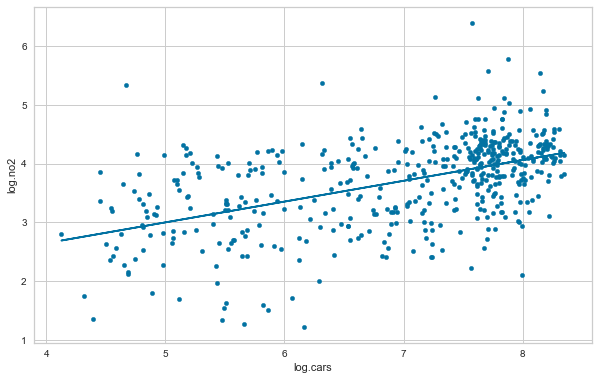

The linear model is: log.no2 = 0.4*log.cars + 1.2
The model has an R^2 score of 0.26


<IPython.core.display.Javascript object>

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10 / 1.618))
linear_model = skllm.LinearRegression()
linear_model.fit(df["log.cars"].to_numpy().reshape(-1, 1), df["log.no2"])
r2 = linear_model.score(df["log.cars"].to_numpy().reshape(-1, 1), df["log.no2"])
y_pred = linear_model.predict(df["log.cars"].to_numpy().reshape(-1, 1))
ax.plot(df["log.cars"].to_numpy(), y_pred)
df.plot.scatter(x="log.cars", y="log.no2", ax=ax)
plt.show()
print(
    f"The linear model is: log.no2 = {linear_model.coef_[0]:.1f}*log.cars + {linear_model.intercept_:.1f}"
)
print(f"The model has an R^2 score of {r2:.2f}")

The R2 score is not very impressive even if the model looks pretty alright by eye. There is definetly a correlation between cars and NO2 though.
The intercept of the model being >0 implies that there will always be a base level of NO2 even without traffic, which makes sense.

## Task 1 c)
I don't know if this is easily possible in Python, so switching to R for this task.

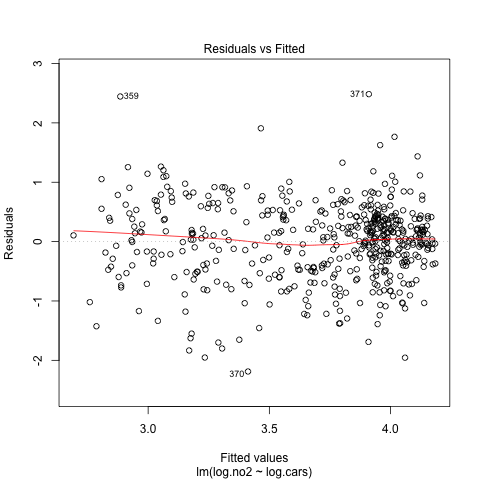

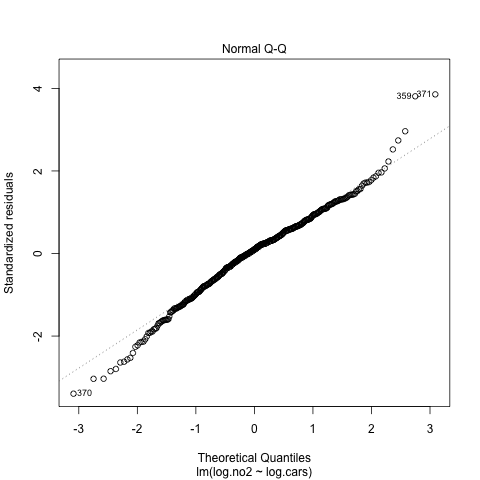

<IPython.core.display.Javascript object>

In [137]:
%%R -i df
# Moving dataframe to R.
library(car)
r_model = lm(log.no2~log.cars, data=df)
plot(r_model, 1:2)

As we can see in the first residual plot the red line is not straight, implying a need for a higher order regression model. 

The Q-Q plot isn't entirely straight, meaning that the distribution of our model (linear) is different from the data. This also implies that the model isn't complex enough.

## Task 1 d)
Using R here too I guess

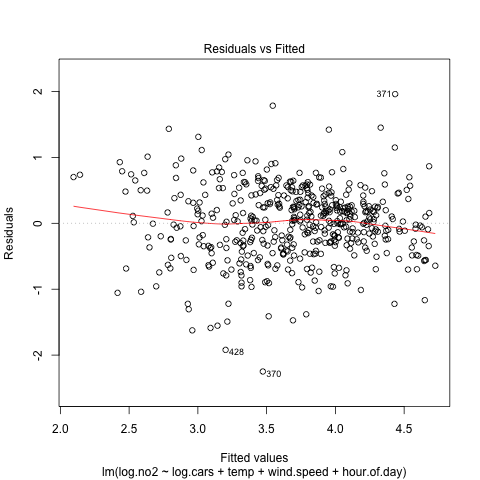

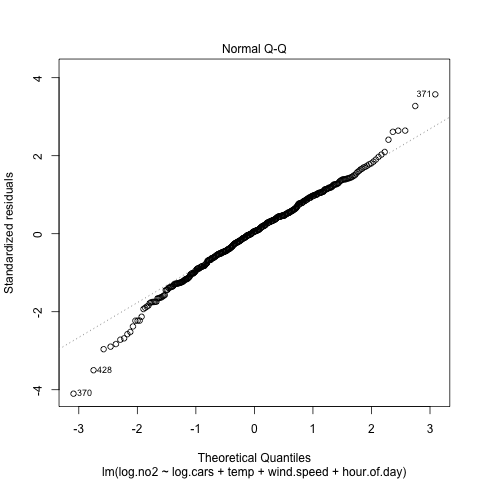

<IPython.core.display.Javascript object>

In [141]:
%%R
full_model = lm(log.no2~log.cars+temp+wind.speed+hour.of.day, data=df)
plot(full_model, 1:2)

This seems to have made the model worse. Performing stepwise selection using AIC criterion:

In [149]:
%%R
library(MASS)
reduced_model <- stepAIC(full_model, direction="both", trace=FALSE)
#plot(reduced_model, 1:2)
summary(reduced_model)


Call:
lm(formula = log.no2 ~ log.cars + temp + wind.speed + hour.of.day, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.24876 -0.32070  0.03084  0.33860  1.96057 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.152131   0.175045   6.582 1.19e-10 ***
log.cars     0.456974   0.028411  16.084  < 2e-16 ***
temp        -0.026855   0.003905  -6.877 1.85e-11 ***
wind.speed  -0.149334   0.014076 -10.609  < 2e-16 ***
hour.of.day -0.013025   0.004452  -2.926   0.0036 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5508 on 495 degrees of freedom
Multiple R-squared:  0.4658,	Adjusted R-squared:  0.4615 
F-statistic: 107.9 on 4 and 495 DF,  p-value: < 2.2e-16



<IPython.core.display.Javascript object>

The stepwise selection chose the full model altough its residual plots looked worse. It seems to make sense in the summary though as all the p-values are lower than 0.05. The R^2 score is actually better for this model than for the simpler model.

Now checking if we need log. Unsure how to go about this, so I will create a model with all values log-ed (except for temperature because of 0> values) and use stepwise selection.

In [152]:
%%R
full_log_model <- lm(log.no2~log.cars+temp+wind.speed+log(wind.speed)+hour.of.day+log(hour.of.day), data=df)
reduced_log_model <- stepAIC(full_log_model, direction="both", trace=FALSE)
summary(reduced_log_model)


Call:
lm(formula = log.no2 ~ log.cars + temp + log(wind.speed) + hour.of.day, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.18068 -0.31840  0.03765  0.33429  1.81757 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.070868   0.170984   6.263 8.21e-10 ***
log.cars         0.457188   0.027931  16.369  < 2e-16 ***
temp            -0.026724   0.003837  -6.964 1.06e-11 ***
log(wind.speed) -0.419388   0.036362 -11.534  < 2e-16 ***
hour.of.day     -0.012297   0.004374  -2.811  0.00513 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5417 on 495 degrees of freedom
Multiple R-squared:  0.4833,	Adjusted R-squared:  0.4791 
F-statistic: 115.7 on 4 and 495 DF,  p-value: < 2.2e-16



<IPython.core.display.Javascript object>

This model performs a bit better according to the R^2 score. We see that the wind speed is better when log-ed. 

Looking at the residual plot and Q-Q:

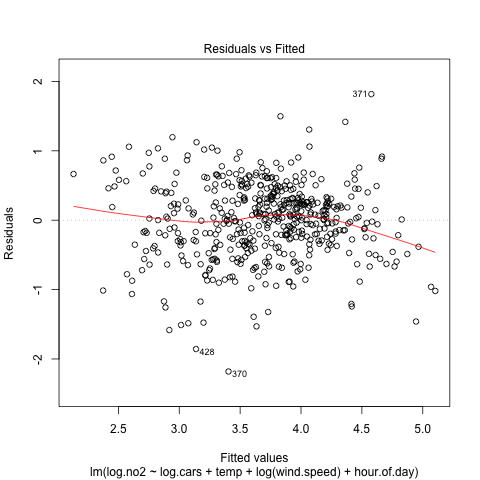

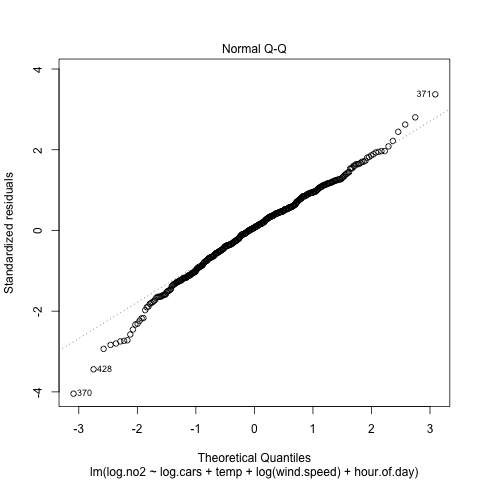

<IPython.core.display.Javascript object>

In [153]:
%%R
plot(reduced_log_model, 1:2)

The residual plots still look a bit worse than the plots of the simplest model even if the more complex model has a twice as high R^2 score. 

When selecting a model it is important to take into account both performance and interprability. Although a simple linear model is most easily understood, the best model here isn't that much more complex and performs better (although not visible in the plots, maybe I'm missing something).

## Task 1 e)

With an intercept > 0 the model implies that there will always be baseline concentrations of NO2 at Alnabru

Cars are the biggest contributors to NO2 concentration. We must remember that it is logged so the dependence is exponential

The wind speed contributes negatively, also exponentially. This makes sense intuitively.

The temperature decreases the concentration slightly. Makes sense as pollution stays on the ground longer when it is cold.

The hour of day is probably highly correlated to the amount of cars (rush hours) and has the highest p-value. There is not much to interpret about this.

As mentioned in the previous task the residual and Q-Q plots look worse for this model than for the simple model. Perhaps we are lacking some more information? Time of year for instance?

## Task 2 a)